In [1]:
import os
import json
import torch
import torch_geometric
from torch_geometric.datasets import TUDataset

/home/danqingwang/.local/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Show Case

In [2]:
root='data/aids'

In [204]:
graphs = TUDataset(root=os.path.join(root, 'tudataset'), name='AIDS')

Extracting data/nci1/tudataset/NCI1/NCI1.zip
Processing...
Done!


In [205]:
graphs[0]

Data(edge_index=[2, 42], x=[21, 37], y=[1])

In [206]:
x_all = []
for graph in graphs:
    x_all.append(graph.x.sum(dim=0))
x_all = torch.stack(x_all).sum(dim=0)
atoms_to_keep = torch.where(x_all > 50)[0]
print(f'There are {len(atoms_to_keep)} valid number of labels!')

There are 10 valid number of labels!


In [207]:
atoms_to_keep

tensor([ 0,  1,  2,  3,  4,  5,  6,  8, 13, 20])

In [208]:
node_mapping = [x.strip().split('\t') for x in open(os.path.join(root, 'raw/node_mapping.txt'))]
node_mapping = dict([(int(x),y) for x, y in node_mapping])

In [209]:
node_mapping

{0: 'C',
 1: 'O',
 2: 'Cl',
 3: 'H',
 4: 'N',
 5: 'F',
 6: 'Br',
 7: 'S',
 8: 'P',
 9: 'I',
 10: 'Na',
 11: 'K',
 12: 'Li',
 13: 'Ca'}

In [210]:
keep_node_mapping = [node_mapping[x.item()] for x in atoms_to_keep]

KeyError: 20

In [172]:
keep_node_mapping

['C', 'O', 'Cl', 'H', 'N', 'F', 'Br', 'S', 'P', 'Na']

In [173]:
node_info = {
    'node_mapping': node_mapping,
    'atoms_to_keep': atoms_to_keep.tolist(),
    'keep_node_mapping': keep_node_mapping,
    'edge_mapping': {0:1,1:2,2:3},
}

In [174]:
node_info

{'node_mapping': {0: 'C',
  1: 'O',
  2: 'Cl',
  3: 'H',
  4: 'N',
  5: 'F',
  6: 'Br',
  7: 'S',
  8: 'P',
  9: 'I',
  10: 'Na',
  11: 'K',
  12: 'Li',
  13: 'Ca'},
 'atoms_to_keep': [0, 1, 2, 3, 4, 5, 6, 7, 8, 10],
 'keep_node_mapping': ['C', 'O', 'Cl', 'H', 'N', 'F', 'Br', 'S', 'P', 'Na'],
 'edge_mapping': {0: 1, 1: 2, 2: 3}}

In [175]:
import json
json.dump(node_info, open(os.path.join(root, 'raw/mapping_info.json'),'w'), indent=2)

In [5]:
node_info = json.load(open(os.path.join(root, 'raw/mapping_info.json')))

In [224]:
graph.edge_attr

In [29]:
graph.edge_index

tensor([[ 0,  0,  0,  0,  1,  1,  1,  2,  2,  2,  2,  3,  3,  3,  4,  4,  4,  4,
          5,  5,  5,  6,  6,  6,  6,  7,  7,  7,  8,  8,  8,  9,  9,  9,  9, 10,
         10, 10, 10, 11, 11, 11, 11, 11, 12, 12, 12, 13, 13, 13, 13, 14, 14, 14,
         15, 15, 15, 15, 16, 16, 16, 16, 17, 17, 17, 17, 18, 18, 18, 18, 19, 19,
         19, 19, 19, 20, 20, 20, 21, 21, 21, 21, 22, 22, 22, 23, 23, 23, 24, 24,
         24, 25, 25, 25, 25, 26, 26, 26, 26, 27, 27, 27, 27, 27, 28, 28, 28, 29,
         29, 29, 29, 30, 30, 30, 31, 31, 31, 31, 32, 32, 32, 32, 33, 33, 33, 33,
         34, 34, 34, 34, 35, 35, 35, 35, 35, 36, 36, 36, 37, 37, 37, 37, 38, 38,
         38, 39, 39, 39],
        [ 8,  9, 10, 11, 13, 14, 15, 16, 17, 18, 19, 21, 22, 23, 24, 25, 26, 27,
         29, 30, 31, 32, 33, 34, 35, 37, 38, 39,  0,  9, 10,  0,  8, 10, 11,  0,
          8,  9, 11,  0,  9, 10, 12, 28, 11, 13, 27,  1, 12, 14, 15,  1, 13, 15,
          1, 13, 14, 16,  2, 15, 17, 18,  2, 16, 18, 19,  2, 16, 17, 19,  2, 17,
  

In [30]:
graph.y

tensor([1])

# Preprocess Dataset

In [12]:
data0 = torch.load('data/mutagenicity/processed/data_0.pt')

In [13]:
data0

Data(x=[16, 10], edge_index=[2, 32], edge_attr=[32], y=0, num_nodes=16)

In [15]:
data0.x

tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]])

In [16]:
data0.edge_attr

tensor([0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
        1, 0, 1, 0, 0, 0, 0, 0])

In [234]:
data0.edge_index

tensor([[ 0,  0,  1,  1,  1,  2,  2,  2,  3,  3,  3,  4,  4,  4,  5,  5,  6,  6,
          7,  7,  7,  8,  8,  8,  9,  9, 10, 11, 11, 12, 12, 12, 12, 13, 13, 13,
         14, 14, 14, 15, 15, 15, 15, 16, 16, 17, 17, 18, 18, 18, 18, 19, 19, 19,
         20, 20, 21, 21, 21, 21, 22, 23, 23, 23, 24, 24, 25, 26, 27, 28, 28, 28,
         28, 29, 29, 30, 30, 31, 31, 31, 31, 32, 32, 32, 33, 33, 34, 34, 34, 34,
         35, 36, 36, 36, 37, 37, 38, 39, 40, 41, 42, 43, 44, 45, 45, 46],
        [ 1,  5,  0,  2, 11,  1,  3, 14,  2,  4,  6,  3,  5,  9,  0,  4,  3,  7,
          6,  8, 10,  7,  9, 45,  4,  8,  7,  1, 12, 11, 13, 26, 27, 12, 14, 37,
          2, 13, 24, 16, 20, 21, 23, 15, 17, 16, 18, 17, 19, 21, 43, 18, 20, 22,
         15, 19, 15, 18, 41, 42, 19, 15, 24, 25, 14, 23, 23, 12, 12, 29, 33, 34,
         36, 28, 30, 29, 31, 30, 32, 34, 44, 31, 33, 35, 28, 32, 28, 31, 39, 40,
         32, 28, 37, 38, 13, 36, 36, 34, 34, 21, 21, 18, 31,  8, 46, 45]])

In [235]:
import torch_geometric.utils as torch_utils
import networkx as nx
keep_bridge=True
nxg = torch_utils.to_networkx(data0, to_undirected=True)  # 157 µs ± 71.9 µs per loop
bridges = set(nx.bridges(nxg)) if keep_bridge else set()  # 556 µs ± 31.2 µs per loop

In [240]:
nxg.edges

EdgeView([(0, 1), (0, 5), (1, 2), (1, 11), (2, 3), (2, 14), (3, 4), (3, 6), (4, 5), (4, 9), (6, 7), (7, 8), (7, 10), (8, 9), (8, 45), (11, 12), (12, 13), (12, 26), (12, 27), (13, 14), (13, 37), (14, 24), (15, 16), (15, 20), (15, 21), (15, 23), (16, 17), (17, 18), (18, 19), (18, 21), (18, 43), (19, 20), (19, 22), (21, 41), (21, 42), (23, 24), (23, 25), (28, 29), (28, 33), (28, 34), (28, 36), (29, 30), (30, 31), (31, 32), (31, 34), (31, 44), (32, 33), (32, 35), (34, 39), (34, 40), (36, 37), (36, 38), (45, 46)])

In [264]:
bridges

{(7, 10),
 (8, 45),
 (12, 26),
 (12, 27),
 (13, 37),
 (14, 24),
 (15, 23),
 (18, 43),
 (19, 22),
 (21, 41),
 (21, 42),
 (23, 24),
 (23, 25),
 (28, 36),
 (31, 44),
 (32, 35),
 (34, 39),
 (34, 40),
 (36, 37),
 (36, 38),
 (45, 46)}

In [269]:
data0.edge_index.size(-1)

106

In [272]:
idx = 105
x, y = data0.edge_index[0,idx], data0.edge_index[1,idx]
(x.item(),y.item())

(46, 45)

In [244]:
data0.has_isolated_nodes()

False

In [261]:
torch.cat((data0.edge_index[:,0:15],data0.edge_index[:,0:15]), dim=-1)

tensor([[ 0,  0,  1,  1,  1,  2,  2,  2,  3,  3,  3,  4,  4,  4,  5,  0,  0,  1,
          1,  1,  2,  2,  2,  3,  3,  3,  4,  4,  4,  5],
        [ 1,  5,  0,  2, 11,  1,  3, 14,  2,  4,  6,  3,  5,  9,  0,  1,  5,  0,
          2, 11,  1,  3, 14,  2,  4,  6,  3,  5,  9,  0]])

In [276]:
i, j = 45,46
data0.edge_index[:, ((data0.edge_index[0] == i) & (data0.edge_index[1] == j) | (data0.edge_index[0] == j) & (data0.edge_index[1] == i))]

tensor([[45, 46],
        [46, 45]])

In [297]:
x, y = ((data0.edge_index[0] == i) & (data0.edge_index[1] == j)).nonzero(as_tuple=True)[0], ((data0.edge_index[0] == j) & (data0.edge_index[1] == i)).nonzero(as_tuple=True)[0]

In [299]:
torch.cat((x, y))

tensor([104, 105])

In [287]:
def th_delete(tensor, indices):
    mask = torch.ones(tensor.numel(), dtype=torch.bool)
    mask[indices] = False
    return tensor[mask]

In [300]:
th_delete(data0.edge_attr, torch.cat((x, y)))

tensor([0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
        0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0])

In [225]:
data0.edge_attr

tensor([0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
        0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [233]:
torch.cat([data0.edge_attr, torch.LongTensor([5])])

tensor([0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
        0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5])

In [ ]:
data0.edge_attr

In [221]:
data0

Data(x=[47, 9], edge_index=[2, 106], edge_attr=[106], y=1, num_nodes=47)

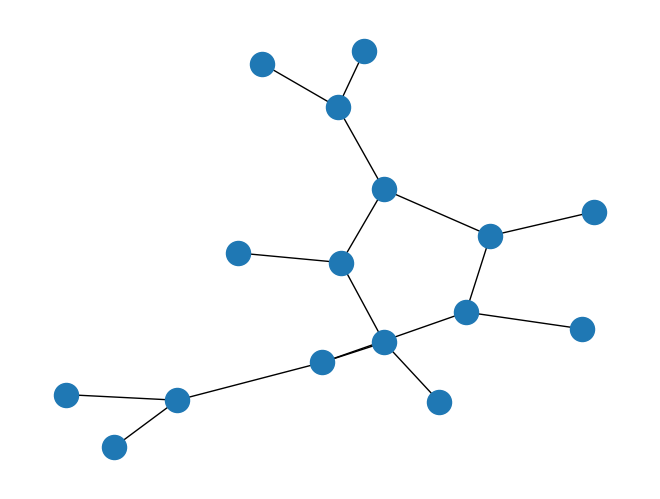

In [192]:
import networkx as nx
g = torch_geometric.utils.to_networkx(data0, to_undirected=True)
nx.draw(g)

In [194]:
data0.edge_index

tensor([[ 0,  0,  0,  1,  1,  1,  2,  2,  2,  3,  3,  3,  4,  5,  6,  6,  6,  7,
          7,  7,  8,  8,  8,  9,  9,  9, 10, 11, 12, 13, 14, 15],
        [ 1,  2,  3,  0,  4,  5,  0,  6, 12,  0,  7, 13,  1,  1,  2,  8, 14,  3,
          8, 15,  6,  7,  9,  8, 10, 11,  9,  9,  2,  3,  6,  7]])

In [195]:
data0.edge_index[:,0]

tensor([0, 1])

In [196]:
data0.x

tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]])

In [183]:
from rdkit import Chem
import matplotlib.pyplot as plt

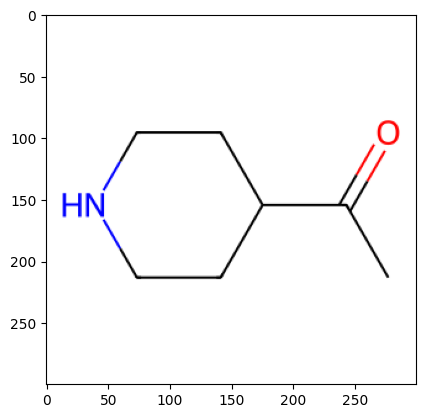

In [197]:
mol = Chem.MolFromSmiles('C1CNCCC1C(=O)C')
im = Chem.Draw.MolToImage(mol)
plt.imshow(im)

In [198]:
def MolFromGraphs(Graph, keep_node_mapping):

    # create empty editable mol object
    mol = Chem.RWMol()

    node_list = Graph.x             # [node_num, node_type]
    edge_index = Graph.edge_index.T # [edge_num, 2]
    edge_attr = Graph.edge_attr     # [edge_num]


    # add atoms to mol and keep track of index
    node_to_idx = {}
    for i in range(len(node_list)):
        node_cls_idx = torch.argmax(node_list[i]).item()
        node = keep_node_mapping[node_cls_idx]
        # print(node_cls_idx, node)
        a = Chem.Atom(node)
        molIdx = mol.AddAtom(a)
        node_to_idx[i] = molIdx

    # add bonds between adjacent atoms
    existing_edges = []
    for idx in range(edge_index.size(0)):
        edge = edge_index[idx]
        ix, iy = edge[0].item(), edge[1].item()
        if (iy, ix) in existing_edges:
            continue
        else:
            existing_edges.append((ix, iy))

        if edge_attr is not None:
            bond_type_id = edge_attr[idx]
            if bond_type_id == 0:
                bond_type = Chem.rdchem.BondType.SINGLE
            elif bond_type_id == 1:
                bond_type = Chem.rdchem.BondType.DOUBLE
            elif bond_type_id == 2:
                bond_type = Chem.rdchem.BondType.TRIPLE
            mol.AddBond(node_to_idx[ix], node_to_idx[iy], bond_type)
        else:
            mol.AddBond(node_to_idx[ix], node_to_idx[iy])
    # Convert RWMol to Mol object
    mol = mol.GetMol()            

    return mol

m = MolFromGraphs(data0, node_mapping)
molstr = Chem.MolToSmiles(m)
print(molstr)


[H]C1=C([H])C(C(=O)Cl)=C([H])C([H])=C1C(=O)Cl


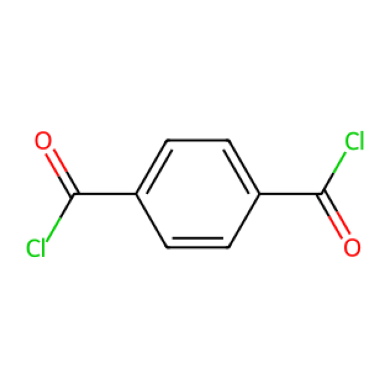

In [199]:
mol = Chem.MolFromSmiles(molstr)
im = Chem.Draw.MolToImage(mol)
plt.axis('off')
plt.imshow(im)

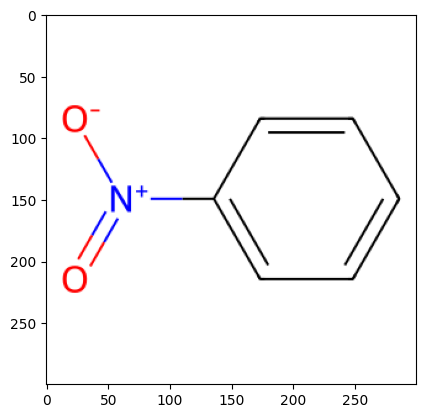

In [202]:
# benzene-NO2 C6H5NO2
no2str =  'c1ccc(cc1)[N+](=O)[O-]'
no2mol = Chem.MolFromSmiles(no2str)
print(no2mol)
im = Chem.Draw.MolToImage(no2mol)
plt.imshow(im)

In [37]:
problems = Chem.DetectChemistryProblems(mol)
print(len(problems))

0


In [62]:
teststr="COC1=CC2=C(OC1=O)C1=C(C=C2)OC(C)(C)C(OC(=O)C23CCC(C)(C(=O)O2)C3(C)C)C1OC(=O)C12CCC(C)(C(=O)O1)C2(C)C"
testm = Chem.MolFromSmiles(teststr, sanitize=False)
problems = Chem.DetectChemistryProblems(m)
print(len(problems))

0


# Result

In [6]:
summary = torch.load('results/mutagenicity/runs/counterfactuals.pt')

In [7]:
summary.keys()

dict_keys(['graph_map', 'graph_index_map', 'counterfactual_candidates', 'MAX_COUNTERFACTUAL_SIZE', 'traversed_hashes', 'input_graphs_covered'])

In [8]:
len(summary['graph_map']), len(summary['input_graphs_covered'])

(41815, 2438)

In [11]:
summary['graph_map']

{-2219250449576846412: Data(x=[25, 10], edge_index=[2, 50], y=0, num_nodes=25),
 -5522722118452338974: Data(x=[25, 10], edge_index=[2, 50], y=0, num_nodes=25),
 -5789978248346758844: Data(x=[25, 10], edge_index=[2, 50], y=0, num_nodes=25),
 -1916883064360485880: Data(x=[26, 10], edge_index=[2, 52], y=0, num_nodes=26),
 -3021915048314159566: Data(x=[26, 10], edge_index=[2, 54], y=0, num_nodes=26),
 4578452983243751223: Data(x=[25, 10], edge_index=[2, 52], y=0, num_nodes=25),
 9177084439239228180: Data(x=[25, 10], edge_index=[2, 54], y=0, num_nodes=25),
 1727503790394534097: Data(x=[25, 10], edge_index=[2, 54], y=0, num_nodes=25),
 -6925478879436839845: Data(x=[26, 10], edge_index=[2, 56], y=0, num_nodes=26),
 5672227903274629626: Data(x=[26, 10], edge_index=[2, 56], y=0, num_nodes=26),
 8775449297587296897: Data(x=[26, 10], edge_index=[2, 58], y=0, num_nodes=26),
 2192198772580304118: Data(x=[26, 10], edge_index=[2, 58], y=0, num_nodes=26),
 1134013998307973132: Data(x=[26, 10], edge_in

In [9]:
summary['counterfactual_candidates']

[{'frequency': 61,
  'graph_hash': -521332475769783705,
  'importance_parts': array([0.79255426, 1.        ]),
  'input_graphs_covering_list': tensor(indices=tensor([[153]]),
         values=tensor([1.]),
         size=(2438,), nnz=1, layout=torch.sparse_coo)},
 {'frequency': 43,
  'graph_hash': -800952140608321265,
  'importance_parts': array([0.89964646, 1.        ]),
  'input_graphs_covering_list': tensor(indices=tensor([[1831]]),
         values=tensor([1.]),
         size=(2438,), nnz=1, layout=torch.sparse_coo)},
 {'frequency': 41,
  'graph_hash': 4526428917648824266,
  'importance_parts': array([0.62599945, 1.        ]),
  'input_graphs_covering_list': tensor(indices=tensor([[2233]]),
         values=tensor([1.]),
         size=(2438,), nnz=1, layout=torch.sparse_coo)},
 {'frequency': 32,
  'graph_hash': -4936495920784129278,
  'importance_parts': array([0.50082415, 1.        ]),
  'input_graphs_covering_list': tensor(indices=tensor([[791]]),
         values=tensor([1.]),
      

In [149]:
mol = []
for cand in summary['counterfactual_candidates']:
    hash = cand['graph_hash']
    g = summary['graph_map'][hash]
    if len(g.edge_attr) == g.edge_index.size(1):
        m = MolFromGraphs(g, keep_node_mapping)
        mol.append(m)


In [150]:
len(mol), len(summary['counterfactual_candidates'])

(4239, 7619)

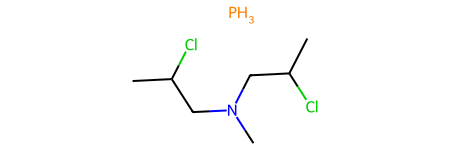

In [151]:
mol[0]

In [152]:
errors = []
for x in mol:
    problems = Chem.DetectChemistryProblems(x)
    if len(problems) != 0:
        errors.append((x, problems))

[21:45:51] Explicit valence for atom # 9 F, 2, is greater than permitted
[21:45:51] Explicit valence for atom # 4 N, 4, is greater than permitted
[21:45:51] Explicit valence for atom # 0 C, 5, is greater than permitted
[21:45:51] Explicit valence for atom # 9 N, 5, is greater than permitted
[21:45:51] Explicit valence for atom # 10 O, 3, is greater than permitted
[21:45:51] Explicit valence for atom # 3 O, 3, is greater than permitted
[21:45:51] Explicit valence for atom # 4 F, 2, is greater than permitted
[21:45:51] Explicit valence for atom # 8 N, 4, is greater than permitted
[21:45:51] Explicit valence for atom # 7 Br, 2, is greater than permitted
[21:45:51] Explicit valence for atom # 9 Cl, 4, is greater than permitted
[21:45:51] Explicit valence for atom # 4 C, 5, is greater than permitted
[21:45:51] Explicit valence for atom # 10 Cl, 5, is greater than permitted
[21:45:51] Explicit valence for atom # 10 Na, 2, is greater than permitted
[21:45:51] Explicit valence for atom # 2 C, 

In [154]:
len(errors), len(mol), len(summary['counterfactual_candidates'])

(847, 4239, 7619)

In [46]:
summary['graph_map'][7760922899577965957]

Data(x=[11, 9], edge_index=[2, 22], edge_attr=[24], y=0, num_nodes=11)

In [216]:
from data import load_dataset
from gnn import load_trained_gnn, load_trained_prediction

dataset_name='aids'

graphs = load_dataset(dataset_name)

# Load GNN model for dataset
gnn_model = load_trained_gnn(dataset_name, device='cpu')
gnn_model.eval()

GNN(
  (convs): ModuleList(
    (0): GCNConv(9, 20)
    (1): GCNConv(20, 20)
    (2): GCNConv(20, 20)
  )
  (bns): ModuleList(
    (0): BatchNorm1d(20, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (1): BatchNorm1d(20, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): BatchNorm1d(20, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (fc): Linear(in_features=20, out_features=2, bias=True)
)

In [219]:
gnn_model.forward(data0)

(tensor([[0.0000e+00, 1.2806e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.6283e+00,
          0.0000e+00, 1.5576e+00, 1.2700e+00, 0.0000e+00, 2.3072e+00, 1.5109e-01,
          0.0000e+00, 5.5394e-01, 0.0000e+00, 2.5634e+00, 1.5597e+00, 2.2477e+00,
          0.0000e+00, 0.0000e+00],
         [0.0000e+00, 5.5862e-01, 3.8040e-01, 3.8041e+00, 0.0000e+00, 1.2629e+00,
          9.7363e-01, 1.0057e+00, 8.4309e-01, 1.2730e-01, 2.3860e+00, 0.0000e+00,
          0.0000e+00, 7.9020e-01, 0.0000e+00, 4.1067e-01, 8.1041e-01, 3.1951e+00,
          9.0857e-01, 2.1539e+00],
         [0.0000e+00, 3.5707e-01, 2.3999e-01, 3.1543e+00, 0.0000e+00, 1.2103e+00,
          1.1114e+00, 1.1156e+00, 1.1318e+00, 2.4297e-01, 5.6265e-01, 0.0000e+00,
          0.0000e+00, 4.8893e-01, 0.0000e+00, 1.0136e+00, 1.1420e+00, 2.7106e+00,
          1.1213e+00, 3.6660e-01],
         [0.0000e+00, 9.8562e-01, 2.1927e-01, 1.3694e+00, 0.0000e+00, 1.0568e+00,
          6.9027e-01, 8.8812e-01, 1.1162e+00, 2.5972e-01, 1.4158e+00, 0.000

# Get Fragment

In [2]:
from util import MolFromGraphs
from data import load_dataset

from tqdm import tqdm
from rdkit import Chem, RDLogger

from common.chem import break_bond, Arm, Skeleton

In [3]:
dataset_name = 'mutagenicity'
dataset = load_dataset(dataset_name)
mapping_info = json.load(open('data/{}/raw/mapping_info.json'.format(dataset_name)))
node_mapping = mapping_info['keep_node_mapping']

In [4]:
mols = [MolFromGraphs(g, node_mapping) for g in dataset]

In [4]:
node_mapping

['C', 'O', 'Cl', 'H', 'N', 'F', 'Br', 'S', 'P', 'Na']

In [5]:
len(node_mapping)

10

In [6]:
dataset[0]

Data(x=[16, 10], edge_index=[2, 32], edge_attr=[32], y=0, num_nodes=16)

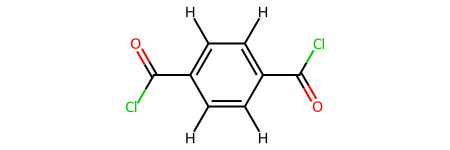

In [8]:
mols[0]

In [8]:
smiles = [Chem.MolToSmiles(m) for m in mols]

In [9]:
smiles[:10]

['[H]C1=C([H])C(C(=O)Cl)=C([H])C([H])=C1C(=O)Cl',
 '[H]OC1([H])C([H])([H])C2=C([H])C([H])([H])C3([H])C([H])(C([H])([H])C([H])([H])C4(C([H])([H])[H])C3([H])C([H])([H])C3([H])N5C([H])([H])C([H])(C([H])([H])[H])C([H])([H])C([H])([H])C5([H])C([H])(C([H])([H])[H])C34[H])C2(C([H])([H])[H])C([H])([H])C1([H])[H]',
 '[H]C(=O)C(Cl)=C(C([H])([H])[H])C([H])([H])[H]',
 '[H]C1=C([H])C(C([H])([H])[H])=C2C([H])=C([H])C3=C(C([H])=C([H])C(C([H])(C([H])([H])[H])C([H])([H])[H])=C3[H])C2=C1[H]',
 '[H]C1=C([H])C2=C(C([H])=C1OC(=O)N([H])C([H])([H])[H])C1(C([H])([H])[H])C([H])(N2C([H])([H])[H])N(C([H])([H])[H])C([H])([H])C1([H])[H]',
 '[H]C1=NC([H])=C([H])C([H])=C1F',
 '[H]C1=C([H])C2=C(C([H])=C1OC([H])([H])C([H])([H])[H])C(C([H])([H])[H])=C([H])C(C([H])([H])[H])(C([H])([H])[H])N2[H]',
 '[H]C([H])([H])C([H])(Br)Br',
 '[H]OC([H])([H])C([H])([H])N([H])C(=O)C([H])([H])C([H])([H])C([H])([H])C([H])([H])C([H])([H])C([H])([H])C([H])([H])C([H])([H])C([H])([H])C([H])([H])C([H])([H])[H]',
 '[H]OC1([H])C23SSC(C([H])([H]

In [10]:
def create_vocab(mols, max_size):
    ### drop arms
    arms, cnts, smiles2idx = [], [], {}
    for mol in tqdm(mols):
        for bond in mol.GetBonds():
            u = bond.GetBeginAtomIdx()
            v = bond.GetEndAtomIdx()
            if not bond.GetBondType() == \
                Chem.rdchem.BondType.SINGLE: continue
            try: skeleton, arm = break_bond(mol, u, v)
            except ValueError: continue

            for reverse in [False, True]:
                if reverse is True:
                    tmp = arm
                    arm = Arm(skeleton.mol, skeleton.u, skeleton.bond_type)
                    skeleton = Skeleton(tmp.mol, tmp.v, tmp.bond_type)

                # functional group check
                mark = False
                if not skeleton.mol.GetAtomWithIdx(
                    skeleton.u).GetAtomicNum() == 6: continue
                if arm.mol.GetNumAtoms() > max_size: continue
                for atom in arm.mol.GetAtoms():
                    if not atom.GetAtomicNum() == 6:
                        mark = True
                        break
                for bond in arm.mol.GetBonds():
                    if mark: break
                    if bond.GetBondType() == \
                        Chem.rdchem.BondType.DOUBLE or \
                        bond.GetBondType() == \
                        Chem.rdchem.BondType.TRIPLE:
                        mark = True
                        break
                if not mark: continue

                smiles = Chem.MolToSmiles(arm.mol, rootedAtAtom=arm.v)
                if smiles.startswith('CC'): continue
                if smiles2idx.get(smiles) is None:
                    smiles2idx[smiles] = len(arms)
                    arms.append(arm)
                    cnts.append(1)
                else: cnts[smiles2idx[smiles]] += 1
        
    return arms, cnts, smiles2idx

In [11]:
max_size = 10
arms, cnts, smiles2idx = create_vocab(mols, max_size)

  0%|          | 0/4308 [00:00<?, ?it/s][19:10:28] Explicit valence for atom # 8 N, 4, is greater than permitted
[19:10:28] Explicit valence for atom # 5 N, 4, is greater than permitted
[19:10:28] Explicit valence for atom # 8 N, 4, is greater than permitted
[19:10:28] Explicit valence for atom # 7 N, 4, is greater than permitted
[19:10:28] Explicit valence for atom # 8 N, 4, is greater than permitted
[19:10:28] Explicit valence for atom # 8 N, 4, is greater than permitted
[19:10:28] Explicit valence for atom # 8 N, 4, is greater than permitted
[19:10:28] Explicit valence for atom # 8 N, 4, is greater than permitted
[19:10:28] Explicit valence for atom # 8 N, 4, is greater than permitted
[19:10:28] Explicit valence for atom # 8 N, 4, is greater than permitted
[19:10:28] Explicit valence for atom # 8 N, 4, is greater than permitted
[19:10:28] Explicit valence for atom # 8 N, 4, is greater than permitted
[19:10:28] Explicit valence for atom # 8 N, 4, is greater than permitted
[19:10:28] 

In [12]:
import pickle

data_dir = "."
vocab_name = dataset

idx2smiles = {idx : smiles for smiles, idx in smiles2idx.items()}
indices = sorted(range(len(cnts)), key=lambda i: cnts[i], reverse=True)
arms = [arms[i] for i in indices]
cnts = [cnts[i] for i in indices]
vocab_dir = os.path.join(data_dir, 'vocab_%s' % vocab_name)
os.makedirs(vocab_dir, exist_ok=True)
with open(os.path.join(vocab_dir, 'arms.pkl'), 'wb') as f:
    pickle.dump(arms, f)
with open(os.path.join(vocab_dir, 'arms.smiles'), 'w') as f:
    for i, cnt in zip(indices, cnts):
        smiles = idx2smiles[i]
        f.write('%i\t%s\n' % (cnt, smiles))

## Mol to Graph

In [6]:
import dgl
import math
import copy
import rdkit
import torch
import numpy as np
from rdkit import Chem
from rdkit.Chem import AllChem, DataStructs
from collections import defaultdict


In [78]:
import torch.nn.functional as F
from torch_geometric.data import Data

def mol_to_geo(mol, atom_types):
    '''
    @params:
        mol : Chem.Mol to transform
    '''
    # g = dgl.DGLGraph()
    # g = dgl.graph([])
    g = Data()

    # add nodes
    def zinc_nodes(mol):
        atom_feats_dict = defaultdict(list)
        num_atoms = mol.GetNumAtoms()
        for u in range(num_atoms):
            atom = mol.GetAtomWithIdx(u)
            symbol = atom.GetSymbol()
            atom_feats_dict['node_type'].append(atom_types[symbol])
        return atom_feats_dict

    atom_feats = zinc_nodes(mol)
    x = torch.LongTensor(atom_feats['node_type'])
    g.x = F.one_hot(x, num_classes=len(atom_types))
    g.num_nodes = len(x)

    # add edges, not complete
    BOND_TYPES = {
        Chem.rdchem.BondType.SINGLE: 0,
        Chem.rdchem.BondType.DOUBLE: 1,
        Chem.rdchem.BondType.TRIPLE: 2,
        None: 0}
    def zinc_edges(mol, edges, self_loop=False):
        bond_feats_dict = defaultdict(list)
        edges = [idxs.tolist() for idxs in edges]
        for e in range(len(edges[0])):
            u, v = edges[0][e], edges[1][e]
            if u == v and not self_loop: continue

            e_uv = mol.GetBondBetweenAtoms(u, v)
            if e_uv is None: bond_type = None
            else: bond_type = e_uv.GetBondType()
            bond_feats_dict['e_feat'].append(BOND_TYPES[bond_type])
        bond_feats_dict['e_feat'] = torch.LongTensor(bond_feats_dict['e_feat'])
        return bond_feats_dict
    
    edge_index = []
    bond_feats = []
    for bond in mol.GetBonds():
        u = bond.GetBeginAtomIdx()
        v = bond.GetEndAtomIdx()
        edge_index.append([u,v])
        edge_index.append([v,u])
    edge_index = sorted(edge_index, key=lambda x:x[0])
    edge_index = torch.LongTensor(edge_index).T
    bond_feats = zinc_edges(mol, edge_index)
    g.edge_index = edge_index
    g.edge_attr = bond_feats['e_feat']
    
    return g

In [6]:
node_mapping
atom_type = {x:i for i,x in enumerate(node_mapping)}
print(atom_type)

{'C': 0, 'O': 1, 'Cl': 2, 'H': 3, 'N': 4, 'F': 5, 'Br': 6, 'S': 7, 'P': 8, 'Na': 9}


In [79]:
gg = mol_to_geo(mols[0], atom_type)

In [80]:
gg

Data(x=[16, 10], num_nodes=16, edge_index=[2, 32], edge_attr=[32])

In [81]:
gg.num_nodes, gg.num_edges

(16, 32)

In [85]:
gg.edge_index[0]

tensor([ 0,  0,  0,  1,  1,  1,  2,  2,  2,  3,  3,  3,  4,  5,  6,  6,  6,  7,
         7,  7,  8,  8,  8,  9,  9,  9, 10, 11, 12, 13, 14, 15])

In [74]:
dataset[0]

Data(x=[16, 10], edge_index=[2, 32], edge_attr=[32], y=0, num_nodes=16)

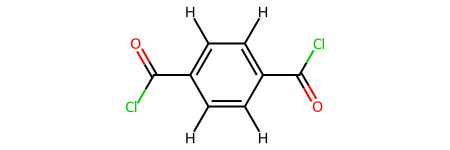

In [48]:
mols[0]

In [49]:
# mols[0].GetNumAtoms()
mol = mols[0]
num_atoms = mols[0].GetNumAtoms()
for u in range(num_atoms):
    atom = mol.GetAtomWithIdx(u)
    charge = atom.GetFormalCharge()
    symbol = atom.GetSymbol()
    atom_type = atom.GetAtomicNum()
    aromatic = atom.GetIsAromatic()
    hybridization = atom.GetHybridization()
    # num_h = atom.GetTotalNumHs()
    print(atom, charge, symbol, atom_type, aromatic, hybridization)

<rdkit.Chem.rdchem.Atom object at 0x7f5112be1ee0> 0 C 6 False UNSPECIFIED
<rdkit.Chem.rdchem.Atom object at 0x7f5112be1fc0> 0 C 6 False UNSPECIFIED
<rdkit.Chem.rdchem.Atom object at 0x7f5112be1690> 0 C 6 False UNSPECIFIED
<rdkit.Chem.rdchem.Atom object at 0x7f5112be1f50> 0 C 6 False UNSPECIFIED
<rdkit.Chem.rdchem.Atom object at 0x7f5112be2030> 0 O 8 False UNSPECIFIED
<rdkit.Chem.rdchem.Atom object at 0x7f5112be2110> 0 Cl 17 False UNSPECIFIED
<rdkit.Chem.rdchem.Atom object at 0x7f5112be20a0> 0 C 6 False UNSPECIFIED
<rdkit.Chem.rdchem.Atom object at 0x7f5112be2180> 0 C 6 False UNSPECIFIED
<rdkit.Chem.rdchem.Atom object at 0x7f5112be21f0> 0 C 6 False UNSPECIFIED
<rdkit.Chem.rdchem.Atom object at 0x7f5112be22d0> 0 C 6 False UNSPECIFIED
<rdkit.Chem.rdchem.Atom object at 0x7f5112be2340> 0 O 8 False UNSPECIFIED
<rdkit.Chem.rdchem.Atom object at 0x7f5112be2260> 0 Cl 17 False UNSPECIFIED
<rdkit.Chem.rdchem.Atom object at 0x7f5112be2490> 0 H 1 False UNSPECIFIED
<rdkit.Chem.rdchem.Atom object at 

In [65]:
edge_index = []
bond_feats = []
for bond in mol.GetBonds():
    u = bond.GetBeginAtomIdx()
    v = bond.GetEndAtomIdx()
    edge_index.append([u,v])
    edge_index.append([v,u])
edge_index = sorted(edge_index, key=lambda x:x[0])
edge_index = torch.LongTensor(edge_index).T
print(edge_index)

tensor([[ 0,  0,  0,  1,  1,  1,  2,  2,  2,  3,  3,  3,  4,  5,  6,  6,  6,  7,
          7,  7,  8,  8,  8,  9,  9,  9, 10, 11, 12, 13, 14, 15],
        [ 1,  2,  3,  0,  4,  5,  0,  6, 12,  0,  7, 13,  1,  1,  2,  8, 14,  3,
          8, 15,  6,  7,  9,  8, 10, 11,  9,  9,  2,  3,  6,  7]])


In [66]:
BOND_TYPES = {
        Chem.rdchem.BondType.SINGLE: 0,
        Chem.rdchem.BondType.DOUBLE: 1,
        Chem.rdchem.BondType.TRIPLE: 2,
        None: 0}

def zinc_edges(mol, edges, self_loop=False):
    bond_feats_dict = defaultdict(list)
    edges = [idxs.tolist() for idxs in edges]
    for e in range(len(edges[0])):
        u, v = edges[0][e], edges[1][e]
        if u == v and not self_loop: continue

        e_uv = mol.GetBondBetweenAtoms(u, v)
        if e_uv is None: bond_type = None
        else: bond_type = e_uv.GetBondType()
        bond_feats_dict['e_feat'].append(BOND_TYPES[bond_type])
    bond_feats_dict['e_feat'] = torch.LongTensor(bond_feats_dict['e_feat'])
    return bond_feats_dict

zinc_edges(mol, edge_index)

defaultdict(list,
            {'e_feat': tensor([0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
                     1, 0, 1, 0, 0, 0, 0, 0])})

In [55]:
print(dataset[0].edge_index)

tensor([[ 0,  0,  0,  1,  1,  1,  2,  2,  2,  3,  3,  3,  4,  5,  6,  6,  6,  7,
          7,  7,  8,  8,  8,  9,  9,  9, 10, 11, 12, 13, 14, 15],
        [ 1,  2,  3,  0,  4,  5,  0,  6, 12,  0,  7, 13,  1,  1,  2,  8, 14,  3,
          8, 15,  6,  7,  9,  8, 10, 11,  9,  9,  2,  3,  6,  7]])


In [61]:
print(dataset[0].edge_attr)

tensor([0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
        1, 0, 1, 0, 0, 0, 0, 0])


In [51]:
print(dataset[0])
print(dataset[0].x)

Data(x=[16, 10], edge_index=[2, 32], edge_attr=[32], y=0, num_nodes=16)
tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]])


In [86]:
from torch_geometric.data import Batch

In [88]:
batch = Batch.from_data_list(dataset[:5])
print(batch)

DataBatch(x=[179, 10], edge_index=[2, 374], edge_attr=[374], y=[5], num_nodes=179, batch=[179], ptr=[6])


In [89]:
batch.num_edges, batch.num_nodes

(374, 179)

# Proposal

In [4]:
from proposal import Proposal_Random
import rdkit.Chem as Chem

In [5]:
max_size = 200
max_sample = 10
data_dir = "/home/danqingwang/workspace/GCFExplainer/"
vocab_name = "AIDS_1837"
vocab_size=1000

In [6]:
edit = Proposal_Random(data_dir, vocab_name, vocab_size, max_size, max_sample, node_mapping)

loaded vocab of size 1000


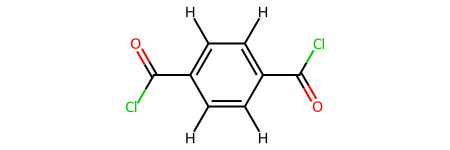

In [8]:
mols[0]

In [10]:
new_mols, fixings = edit.propose(mols[:5])

5 False
5 False
1 False
3 False
3 False


[07:53:47] Explicit valence for atom # 3 C, 5, is greater than permitted
[07:53:47] Explicit valence for atom # 10 O, 3, is greater than permitted
[07:53:47] Explicit valence for atom # 19 C, 5, is greater than permitted
[07:53:47] Explicit valence for atom # 27 C, 5, is greater than permitted
[07:53:47] Explicit valence for atom # 16 C, 5, is greater than permitted
[07:53:47] Explicit valence for atom # 15 C, 5, is greater than permitted
[07:53:47] Explicit valence for atom # 38 H, 2, is greater than permitted
[07:53:47] Explicit valence for atom # 9 C, 5, is greater than permitted


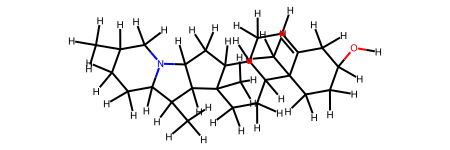

In [11]:
new_mols[1]

In [13]:
fixings

[1.0, 1.0, 1.0, 1.0, 1.0]

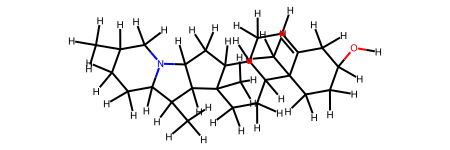

In [12]:
mols[1]

In [22]:
new_mols[0].GetNumBonds()

2

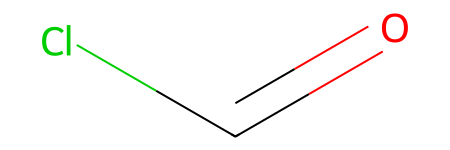

In [24]:
Chem.RemoveHs(new_mols[0])

In [17]:
mols[0] == new_mols[0]

True

In [13]:
fixings

[1.0]

In [16]:
edit.dataset[0]

(Data(x=[16, 10], num_nodes=16, edge_index=[2, 32], edge_attr=[32]),
 {'act': 1, 'del': 7, 'add': 8, 'arm': 252})

In [15]:
new_mols, fixings = edit.propose([mols[0]] * 10000)

[08:15:41] Explicit valence for atom # 5 Cl, 2, is greater than permitted
[08:15:41] Explicit valence for atom # 7 C, 5, is greater than permitted
[08:15:41] Explicit valence for atom # 12 H, 2, is greater than permitted
[08:15:41] Explicit valence for atom # 2 C, 5, is greater than permitted
[08:15:41] Explicit valence for atom # 8 C, 5, is greater than permitted
[08:15:41] Explicit valence for atom # 4 O, 3, is greater than permitted
[08:15:41] Explicit valence for atom # 9 C, 5, is greater than permitted
[08:15:41] Explicit valence for atom # 4 O, 3, is greater than permitted
[08:15:41] Explicit valence for atom # 4 O, 3, is greater than permitted
[08:15:41] Explicit valence for atom # 7 C, 5, is greater than permitted
[08:15:41] Explicit valence for atom # 3 C, 5, is greater than permitted
[08:15:41] Explicit valence for atom # 13 H, 2, is greater than permitted
[08:15:41] Explicit valence for atom # 11 Cl, 2, is greater than permitted
[08:15:41] Explicit valence for atom # 7 C, 5,

10 True
3 False
10 True
10 True
2 False
2 False
3 False
4 False
3 False
10 True
6 False
10 True
10 True
3 False
2 False
7 False
2 False
8 False
2 False
3 False
8 False
4 False
6 False
10 True
2 False
2 False
1 False
10 True
3 False
7 False
4 False
2 False
1 False
2 False
1 False
10 True
10 True
1 False
5 False
10 True
10 True
3 False
1 False
6 False
5 False
1 False
10 True
10 True
2 False
10 True
5 False
2 False
9 False
2 False
10 True
1 False
3 False
10 True
2 False
10 True
10 True
10 True
10 True
8 False
1 False
4 False
3 False
7 False
2 False
3 False
3 False
3 False
10 True
2 False
3 False
10 True
10 True
6 False
1 False
6 False
6 False
3 False
1 False
10 True
2 False
10 False
1 False
1 False
1 False
9 False
1 False
7 False
9 False
10 True
3 False
8 False
2 False
10 False
5 False
9 False
8 False
3 False
6 False
1 False
10 False
5 False
10 True
5 False
10 False
6 False
5 False
3 False
3 False
10 True
4 False
2 False
6 False
4 False
2 False
8 False
3 False
10 False
7 False
10 True
3 F

[08:15:41] Explicit valence for atom # 13 H, 2, is greater than permitted
[08:15:41] Explicit valence for atom # 14 H, 2, is greater than permitted
[08:15:41] Explicit valence for atom # 11 Cl, 2, is greater than permitted
[08:15:41] Explicit valence for atom # 2 C, 5, is greater than permitted
[08:15:41] Explicit valence for atom # 8 C, 5, is greater than permitted
[08:15:41] Explicit valence for atom # 1 C, 5, is greater than permitted
[08:15:41] Explicit valence for atom # 14 H, 2, is greater than permitted
[08:15:41] Explicit valence for atom # 13 H, 2, is greater than permitted
[08:15:41] Explicit valence for atom # 4 O, 3, is greater than permitted
[08:15:41] Explicit valence for atom # 8 C, 5, is greater than permitted
[08:15:41] Explicit valence for atom # 6 C, 5, is greater than permitted
[08:15:41] Explicit valence for atom # 11 Cl, 2, is greater than permitted
[08:15:41] Explicit valence for atom # 15 H, 2, is greater than permitted
[08:15:41] Explicit valence for atom # 5 C

5 False
10 True
10 True
10 True
3 False
2 False
1 False
9 False
10 True
8 False
2 False
10 True
3 False
10 True
2 False
10 True
8 False
9 False
2 False
10 True
8 False
10 True
2 False
2 False
10 True
10 True
10 False
5 False
3 False
1 False
5 False
4 False
2 False
3 False
10 True
10 True
10 True
2 False
7 False
3 False
2 False
1 False
4 False
8 False
4 False
3 False
4 False
9 False
8 False
5 False
10 True
1 False
10 True
1 False
3 False
1 False
1 False
10 True
8 False
2 False
9 False
10 True
8 False
3 False
10 True
1 False
8 False
3 False
3 False
2 False
5 False
7 False
5 False
2 False
2 False
2 False
2 False
2 False
8 False
2 False
1 False
4 False
3 False
3 False
9 False
4 False
4 False
10 False
9 False
3 False
6 False
8 False
10 True
10 True
4 False
1 False
5 False
1 False
7 False
2 False
3 False
1 False
7 False
9 False
3 False
6 False
1 False
6 False
1 False
4 False
1 False
10 False
3 False
1 False
10 True
5 False
10 True
5 False
8 False
1 False
4 False
1 False
8 False
3 False
10 Tr

[08:15:46] Explicit valence for atom # 11 Cl, 2, is greater than permitted
[08:15:46] Explicit valence for atom # 0 C, 5, is greater than permitted
[08:15:46] Explicit valence for atom # 6 C, 5, is greater than permitted
[08:15:46] Explicit valence for atom # 14 H, 2, is greater than permitted
[08:15:46] Explicit valence for atom # 8 C, 5, is greater than permitted
[08:15:46] Explicit valence for atom # 1 C, 5, is greater than permitted
[08:15:46] Explicit valence for atom # 1 C, 5, is greater than permitted
[08:15:46] Explicit valence for atom # 12 H, 2, is greater than permitted
[08:15:46] Explicit valence for atom # 8 C, 5, is greater than permitted
[08:15:46] Explicit valence for atom # 4 O, 3, is greater than permitted
[08:15:46] Explicit valence for atom # 9 C, 5, is greater than permitted
[08:15:46] Explicit valence for atom # 5 Cl, 2, is greater than permitted
[08:15:46] Explicit valence for atom # 6 C, 5, is greater than permitted
[08:15:46] Explicit valence for atom # 11 Cl, 

5 False
6 False
7 False
1 False
1 False
2 False
3 False
10 True
10 True
10 True
2 False
2 False
4 False
3 False
7 False
3 False
10 True
8 False
6 False
4 False
6 False
2 False
4 False
4 False
10 True
1 False
1 False
1 False
10 True
7 False
3 False
7 False
3 False
10 True
2 False
10 True
3 False
1 False
7 False
5 False
1 False
7 False
3 False
3 False
10 False
2 False
1 False
1 False
6 False
1 False
2 False
2 False
3 False
5 False
2 False
2 False
4 False
7 False
10 True
10 True
2 False
4 False
3 False
10 True
10 True
10 True
5 False
10 False
5 False
5 False
1 False
8 False
2 False
3 False
8 False
1 False
6 False
6 False
7 False
7 False
7 False
3 False
3 False
7 False
2 False
4 False
2 False
2 False
10 False
1 False
3 False
4 False
3 False
4 False
10 True
1 False
2 False
1 False
6 False
5 False
10 True
8 False
5 False
8 False
4 False
9 False
4 False
1 False
6 False
8 False
2 False
1 False
1 False
2 False
5 False
10 True
10 True
10 True
10 False
2 False
10 True
1 False
3 False
2 False
1 Fa

[08:15:47] Explicit valence for atom # 7 C, 5, is greater than permitted
[08:15:47] Explicit valence for atom # 11 Cl, 2, is greater than permitted
[08:15:47] Explicit valence for atom # 12 H, 2, is greater than permitted
[08:15:47] Explicit valence for atom # 13 H, 2, is greater than permitted
[08:15:47] Explicit valence for atom # 10 O, 3, is greater than permitted
[08:15:47] Explicit valence for atom # 15 H, 2, is greater than permitted
[08:15:47] Explicit valence for atom # 7 C, 5, is greater than permitted
[08:15:47] Explicit valence for atom # 1 C, 5, is greater than permitted
[08:15:47] Explicit valence for atom # 6 C, 5, is greater than permitted
[08:15:47] Explicit valence for atom # 3 C, 5, is greater than permitted
[08:15:47] Explicit valence for atom # 1 C, 5, is greater than permitted
[08:15:47] Explicit valence for atom # 2 C, 5, is greater than permitted
[08:15:47] Explicit valence for atom # 12 H, 2, is greater than permitted
[08:15:47] Explicit valence for atom # 3 C, 

7 False
7 False
1 False
10 True
4 False
5 False
3 False
10 True
10 True
10 True
2 False
2 False
7 False
9 False
10 True
6 False
7 False
4 False
10 True
1 False
10 True
3 False
1 False
2 False
6 False
6 False
1 False
4 False
7 False
1 False
1 False
5 False
2 False
9 False
3 False
10 True
3 False
4 False
10 False
3 False
1 False
10 True
5 False
6 False
4 False
2 False
10 False
10 False
2 False
6 False
7 False
6 False
5 False
10 False
2 False
8 False
7 False
9 False
6 False
3 False
10 False
10 True
1 False
1 False
10 False
2 False
10 False
2 False
10 True
6 False
8 False
9 False
4 False
4 False
1 False
3 False
8 False
5 False
10 True
10 True
1 False
4 False
5 False
2 False
3 False
10 True
10 True
1 False
7 False
1 False
5 False
9 False
4 False
10 True
2 False
1 False
3 False
8 False
5 False
2 False
1 False
10 True
6 False
10 True
3 False
8 False
3 False
7 False
2 False
3 False
6 False
2 False
1 False
9 False
1 False
10 True
6 False
9 False
3 False
10 True
3 False
2 False
5 False
4 False
1

[08:15:48] Explicit valence for atom # 3 C, 5, is greater than permitted
[08:15:48] Explicit valence for atom # 4 O, 3, is greater than permitted
[08:15:48] Explicit valence for atom # 8 C, 5, is greater than permitted
[08:15:48] Explicit valence for atom # 5 Cl, 2, is greater than permitted
[08:15:48] Explicit valence for atom # 13 H, 2, is greater than permitted
[08:15:48] Explicit valence for atom # 15 H, 2, is greater than permitted
[08:15:48] Explicit valence for atom # 1 C, 5, is greater than permitted
[08:15:48] Explicit valence for atom # 11 Cl, 2, is greater than permitted
[08:15:48] Explicit valence for atom # 2 C, 5, is greater than permitted
[08:15:48] Explicit valence for atom # 15 H, 2, is greater than permitted
[08:15:48] Explicit valence for atom # 2 C, 5, is greater than permitted
[08:15:48] Explicit valence for atom # 2 C, 5, is greater than permitted
[08:15:48] Explicit valence for atom # 6 C, 5, is greater than permitted
[08:15:48] Explicit valence for atom # 4 O, 3

1 False
10 True
10 True
10 True
5 False
10 True
1 False
5 False
1 False
1 False
9 False
7 False
2 False
10 False
3 False
6 False
4 False
1 False
10 True
5 False
1 False
10 True
2 False
3 False
10 True
6 False
7 False
10 True
10 True
10 True
10 False
10 True
2 False
2 False
10 True
3 False
3 False
10 True
1 False
10 True
1 False
10 True
6 False
2 False
8 False
2 False
10 True
4 False
1 False
4 False
4 False
6 False
3 False
9 False
8 False
4 False
2 False
9 False
6 False
10 True
1 False
4 False
4 False
7 False
1 False
10 True
8 False
3 False
7 False
8 False
2 False
1 False
2 False
9 False
2 False
7 False
1 False
2 False
9 False
4 False
7 False
5 False
4 False
3 False
3 False
7 False
6 False
10 False
10 True
8 False
5 False
4 False
10 True
8 False
4 False
5 False
1 False
6 False
3 False
5 False
6 False
3 False
10 True
7 False
1 False
1 False
3 False
6 False
5 False
3 False
10 True
3 False
6 False
3 False
5 False
2 False
3 False
10 True
1 False
7 False
3 False
7 False
1 False
7 False
8 Fal

[08:15:49] Explicit valence for atom # 10 O, 3, is greater than permitted
[08:15:49] Explicit valence for atom # 7 C, 5, is greater than permitted
[08:15:49] Explicit valence for atom # 6 C, 5, is greater than permitted
[08:15:49] Explicit valence for atom # 14 H, 2, is greater than permitted
[08:15:49] Explicit valence for atom # 15 H, 2, is greater than permitted
[08:15:49] Explicit valence for atom # 1 C, 5, is greater than permitted
[08:15:49] Explicit valence for atom # 0 C, 5, is greater than permitted
[08:15:49] Explicit valence for atom # 1 C, 5, is greater than permitted
[08:15:49] Explicit valence for atom # 5 Cl, 2, is greater than permitted
[08:15:49] Explicit valence for atom # 11 Cl, 2, is greater than permitted
[08:15:49] Explicit valence for atom # 12 H, 2, is greater than permitted
[08:15:49] Explicit valence for atom # 12 H, 2, is greater than permitted
[08:15:49] Explicit valence for atom # 12 H, 2, is greater than permitted
[08:15:49] Explicit valence for atom # 15 

10 True
10 True
10 True
2 False
10 True
10 True
10 True
3 False
5 False
10 True
3 False
10 True
10 True
1 False
1 False
7 False
1 False
1 False
1 False
7 False
3 False
3 False
1 False
10 True
2 False
3 False
10 True
4 False
3 False
2 False
2 False
2 False
5 False
5 False
7 False
3 False
1 False
2 False
1 False
4 False
1 False
6 False
10 True
10 True
10 False
7 False
2 False
1 False
10 True
4 False
7 False
10 True
1 False
2 False
2 False
6 False
10 True
3 False
5 False
4 False
1 False
1 False
4 False
1 False
10 True
6 False
1 False
3 False
3 False
5 False
3 False
8 False
6 False
6 False
5 False
10 True
9 False
5 False
5 False
10 True
3 False
10 False
10 True
10 False
10 False
1 False
2 False
4 False
5 False
10 False
5 False
10 True
3 False
2 False
7 False
3 False
1 False
1 False
2 False
10 False
8 False
6 False
2 False
1 False
5 False
7 False
7 False
8 False
3 False
8 False
10 False
7 False
10 True
4 False
3 False
1 False
10 True
7 False
5 False
6 False
6 False
1 False
5 False
1 False
6

[08:15:50] Explicit valence for atom # 3 C, 5, is greater than permitted
[08:15:50] Explicit valence for atom # 7 C, 5, is greater than permitted
[08:15:50] Explicit valence for atom # 10 O, 3, is greater than permitted
[08:15:50] Explicit valence for atom # 11 Cl, 2, is greater than permitted
[08:15:50] Explicit valence for atom # 13 H, 2, is greater than permitted
[08:15:50] Explicit valence for atom # 0 C, 5, is greater than permitted
[08:15:50] Explicit valence for atom # 15 H, 2, is greater than permitted
[08:15:50] Explicit valence for atom # 9 C, 5, is greater than permitted
[08:15:50] Explicit valence for atom # 5 Cl, 2, is greater than permitted
[08:15:50] Explicit valence for atom # 5 Cl, 2, is greater than permitted
[08:15:50] Explicit valence for atom # 2 C, 5, is greater than permitted
[08:15:50] Explicit valence for atom # 11 Cl, 2, is greater than permitted
[08:15:50] Explicit valence for atom # 11 Cl, 2, is greater than permitted
[08:15:50] Explicit valence for atom # 1

1 False
6 False
7 False
1 False
3 False
10 True
7 False
5 False
9 False
10 True
5 False
6 False
4 False
8 False
10 False
1 False
6 False
3 False
10 False
2 False
10 True
6 False
1 False
1 False
5 False
3 False
4 False
4 False
1 False
2 False
9 False
1 False
10 True
10 False
10 True
7 False
10 True
4 False
1 False
2 False
3 False
3 False
1 False
1 False
1 False
10 True
2 False
5 False
4 False
5 False
3 False
8 False
10 True
1 False
1 False
2 False
6 False
8 False
5 False
6 False
1 False
3 False
10 True
7 False
2 False
2 False
3 False
7 False
2 False
10 True
7 False
6 False
1 False
10 False
3 False
1 False
6 False
2 False
2 False
1 False
4 False
8 False
5 False
10 True
1 False
5 False
3 False
2 False
2 False
1 False
2 False
1 False
2 False
10 True
8 False
7 False
10 True
10 True
1 False
10 True
1 False
1 False
2 False
10 True
4 False
2 False
10 True
10 False
10 True
10 True
8 False
6 False
2 False
7 False
4 False
10 True
3 False
1 False
8 False
8 False
1 False
10 True
5 False
6 False
6 F

[08:15:51] Explicit valence for atom # 2 C, 5, is greater than permitted
[08:15:51] Explicit valence for atom # 8 C, 5, is greater than permitted
[08:15:51] Explicit valence for atom # 3 C, 5, is greater than permitted
[08:15:51] Explicit valence for atom # 7 C, 5, is greater than permitted
[08:15:51] Explicit valence for atom # 13 H, 2, is greater than permitted
[08:15:51] Explicit valence for atom # 0 C, 5, is greater than permitted
[08:15:51] Explicit valence for atom # 6 C, 5, is greater than permitted
[08:15:51] Explicit valence for atom # 5 Cl, 2, is greater than permitted
[08:15:51] Explicit valence for atom # 12 H, 2, is greater than permitted
[08:15:51] Explicit valence for atom # 10 O, 3, is greater than permitted
[08:15:51] Explicit valence for atom # 14 H, 2, is greater than permitted
[08:15:51] Explicit valence for atom # 7 C, 5, is greater than permitted
[08:15:51] Explicit valence for atom # 13 H, 2, is greater than permitted
[08:15:51] Explicit valence for atom # 0 C, 5

In [11]:
rex = [x for x in new_mols if x != mols[0]]
len(set(rex))

5

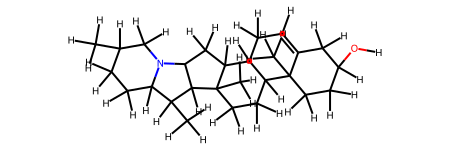

In [12]:
rex[1]

In [14]:
from common.chem import mol_to_geo

atom_type = {x:i for i,x in enumerate(node_mapping)}
mol_to_geo(rex[0], atom_type)

Data(x=[3, 10], num_nodes=3, edge_index=[2, 4], edge_attr=[4])

In [14]:
from rdkit import RDLogger
RDLogger.DisableLog('rdApp.*') 

In [8]:
dataset[0]

Data(x=[16, 10], edge_index=[2, 32], edge_attr=[32], y=0, num_nodes=16)

In [15]:
new_mols, actions = edit.propose_from_graph(dataset[0])

In [16]:
len(new_mols)

2779

In [13]:
actions

[(0, 0, None, None),
 (0, 3, None, None),
 (0, 5, None, None),
 (0, 8, None, None),
 (0, 11, None, None),
 (0, 16, None, None),
 (0, 19, None, None),
 (0, 22, None, None),
 (0, 23, None, None),
 (0, 25, None, None),
 (1, None, 16, 26),
 (1, None, 16, 34),
 (1, None, 16, 63),
 (1, None, 16, 70),
 (1, None, 16, 77),
 (1, None, 16, 78),
 (1, None, 16, 102),
 (1, None, 16, 104),
 (1, None, 16, 123),
 (1, None, 16, 135),
 (1, None, 16, 138),
 (1, None, 16, 145),
 (1, None, 16, 150),
 (1, None, 16, 157),
 (1, None, 16, 158),
 (1, None, 16, 160),
 (1, None, 16, 166),
 (1, None, 16, 174),
 (1, None, 16, 196),
 (1, None, 16, 198),
 (1, None, 16, 203),
 (1, None, 16, 204),
 (1, None, 16, 213),
 (1, None, 16, 215),
 (1, None, 16, 218),
 (1, None, 16, 224),
 (1, None, 16, 229),
 (1, None, 16, 235),
 (1, None, 16, 238),
 (1, None, 16, 240),
 (1, None, 16, 247),
 (1, None, 16, 248),
 (1, None, 16, 252),
 (1, None, 16, 255),
 (1, None, 16, 263),
 (1, None, 16, 265),
 (1, None, 16, 266),
 (1, None, 16